# Chapter 4: Dipping Toes in Deep Learning

## Fully-Connected Neural Networks

We have already discussed a type of fully-connected neural network (i.e. multi-layer perceptron) in Chapter 1. In this chapter we will learn about a new type of fully-connected neural network; an *autoencoder* model. An autoencoder is primarly used to be trained in an unsupervised fashion. This means the model can be trained just using inputs, and no labels. 

In this chapter, you will train an autoencoder to reconstruct images. Specifically, the autoencoder takes the image data, compress it to a small latent space and then reconstruct the image from the compressed latent space values. This is a great way to provide useful features using unsupervised data, for supervised models. For this task we will be using a popular hand-written digit dataset known as MNIST (https://en.wikipedia.org/wiki/MNIST_database).

In chapter 3, you learned about TensorFlow’s model-building APIs and data handling. This chapter focuses on building deep neural networks to solve problems. Deep learning encompasses various algorithms that differ by data type (e.g., structured data, images, time series) and network depth. The main types discussed here are fully connected networks (FCNs), convolutional neural networks (CNNs), and recurrent neural networks (RNNs).

Mastering the implementation of these models is essential for success in research and data science, as it builds the foundation for creating advanced, state-of-the-art deep networks. After revisiting FCNs and CNN operations such as convolution and pooling, the chapter introduces RNNs—models designed for time-series data that learn from past patterns to predict future outcomes.

## Import necessary libraries

In [2]:
import random
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
%matplotlib inline

def fix_random_seed(seed):
    """ Setting the random seed of various libraries """
    try:
        np.random.seed(seed)
    except NameError:
        print("Warning: Numpy is not imported. Setting the seed for Numpy failed.")
    try:
        tf.random.set_seed(seed)
    except NameError:
        print("Warning: TensorFlow is not imported. Setting the seed for TensorFlow failed.")
    try:
        random.seed(seed)
    except NameError:
        print("Warning: random module is not imported. Setting the seed for random failed.")
   
# Fixing the random seed
fix_random_seed(4321)
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.20.0


While going through the attic, you discover old, damaged photos of your grandmother. Knowing that deep learning can restore aged photos and videos, you decide to build an image restoration model using TensorFlow. To begin, you experiment with restoring corrupted handwritten digit images to understand the model and training process. You choose an **autoencoder**—a type of FCN—with the following structure:

- **Input layer:** 784 nodes  
- **Hidden layers:** 64 (ReLU), 32 (ReLU), 64 (ReLU)  
- **Output layer:** 784 nodes (tanh activation)


## Loading MNIST data

Let's load the dataset using Keras. Due to the popularity of the dataset, many utility functions can be found to load the dataset with just a single line of code. `x_train` and `x_test` contains 28x28 sized images of hand-written digits and `y_train` and `y_test` contains the inter number representing that image (the label).

In [3]:
# Section 4.1

# Loading the data
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Print x_train and y_train
print(x_train)
print('x_train has shape: {}'.format(x_train.shape))
print('\n')
print(y_train)
print('y_train has shape: {}'.format(y_train.shape))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
x_train has shape: (60000, 28, 28)


[5 0 4 ... 5 6 8]
y_train has shape: (60000,)


## Transforming MNIST data

This is an important step. We do two important things here.

* Unwrap the (28x28) image into a 1-dimensional 784 vector (because fully-connected networks need a 1-dimensional input).
* Normalize the input by subtracting 128 and dividing by 128. This is because the pixel values are between [0,255].

In [5]:
# Section 4.1

# Some simple preprocessing on the data
norm_x_train = ((x_train - 128.0)/128.0).reshape([-1,784])

## Extracting a small sample and plotting the data

Here we will plot some of the data to get an idea of what we are dealing with.

In [6]:
# Section 4.1

# We will extract a small sample from the training data to inspect visually
sample_images, sample_labels = [],[]
for i, (img, lbl) in enumerate(zip(x_train, y_train)):
    sample_images.append(img)
    sample_labels.append(lbl)
    if i>=9: break

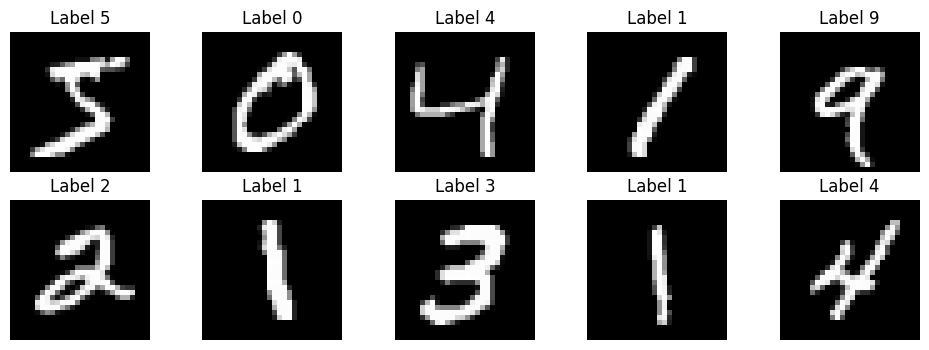

In [7]:
import matplotlib.pyplot as plt
# Plotting the images
f, axes = plt.subplots(2, 5, figsize=(12,4))
for i, (img, lbl) in enumerate(zip(sample_images, sample_labels)):
    r, c = i//5, i%5
    axes[r,c].imshow(img,cmap='gray')
    axes[r,c].axis('off')
    axes[r,c].set_title("Label {}".format(lbl))

## Creating corrupted images

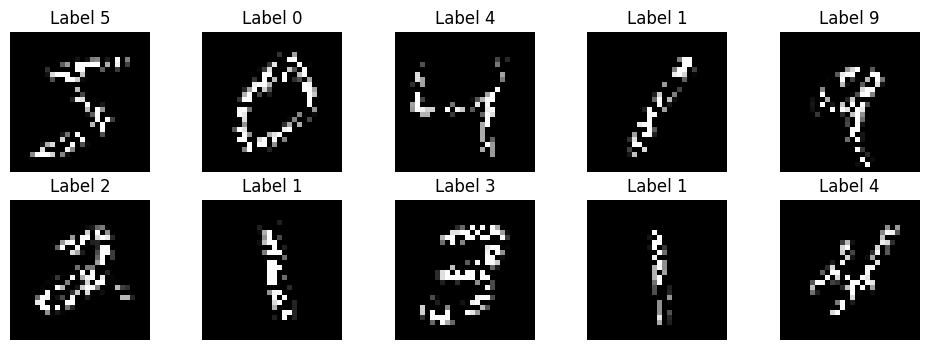

In [8]:
# Section 4.1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_train_sample = x_train[:10]
y_train_sample = y_train[:10]

def generate_masked_inputs(x, p, seed=None):
    """ This function applies a binary mask to the input and generate corrupted images """
    # Fixing the seed
    if seed:
        np.random.seed(seed)
    # Generating a mask using the binomial distribution
    mask = np.random.binomial(n=1, p=p, size=x.shape).astype('float32')
    return x * mask

# Create a training dataset of corrupted images
masked_x_train_sample = generate_masked_inputs(x_train_sample, 0.5)

# Plotting some of the images
f, axes = plt.subplots(2, 5, figsize=(12,4))
for i, (img, lbl) in enumerate(zip(masked_x_train_sample, y_train_sample)):
    r, c = i//5, i%5
    axes[r,c].imshow(img,cmap='gray')
    axes[r,c].axis('off')
    axes[r,c].set_title("Label {}".format(lbl))

## Defining the autoencoder model

Now it's time to define the model. We will define a simple autoencoder model. This model has the following layers.

* A Dense layer with 64 nodes and `relu` activation
* A Dense layer with 32 nodes and `relu` activation
* A Dense layer with 64 nodes and `relu` activation
* A Dense layer with 784 nodes and `tanh` activation (i.e. the layer that reconstructs the images)

Finally, we will compile the model with mean squared error (mse) loss and the `adam` optimizer.

In [9]:
# Section 4.1
# Code listing 4.1 

from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

K.clear_session()

# Defining the model
autoencoder = models.Sequential(
    [layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(784, activation='tanh')]
)

# Compiling the model
autoencoder.compile(loss='mse', optimizer='adam')

# Printing the model summary
autoencoder.summary()

d:\Source Code\ML\Tensor Flow in Action\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

## Training the model

Training the model is simple. You call the `fit()` method with the correct data. Note how the input and the output to the model are the same. This is because we are trying to construct the exact same input as the output of the model. We are using a batch size of 64 and 10 epochs.

In [10]:
# Section 4.1

# Generating the corrupted version of norm_x_train to be used as training inputs
masked_x_train = generate_masked_inputs(norm_x_train, 0.5, seed=1024)
# Fit the model
history = autoencoder.fit(masked_x_train, norm_x_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1561
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1028
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0945
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0882
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0844
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0819
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0804
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0793
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0784
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0775


## Plotting the loss over time

It is quite clear that our model is learning. You can see the loss steadily going down.

Text(0.5, 1.0, 'Autoencoder reconstruction loss for MNIST dataset')

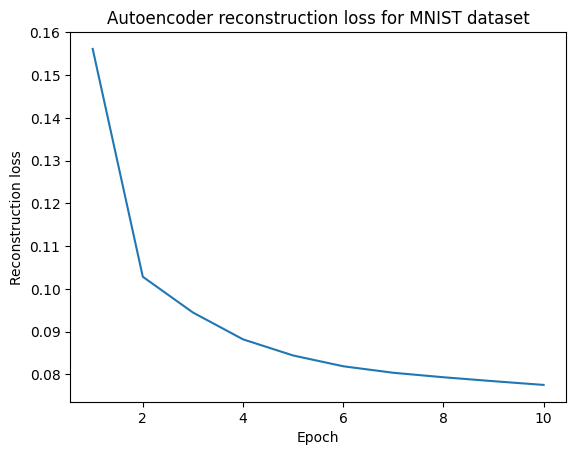

In [11]:
# Section 4.1

# Plotting the loss
plt.plot(np.arange(1,11), history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Reconstruction loss")
plt.title("Autoencoder reconstruction loss for MNIST dataset")

## Predicting restorations of the corrupted images from the network

Great we have a trained model. Now let's get a small sample of images, corrupt them with a mask and then ask the model to predict the correct restoration of the images.

In [12]:
# Section 4.1

# We will use the first 10 samples in our dataset to test the model
x_train_sample = x_train[:10]
y_train_sample = y_train[:10]

# Generating corrupted images using a previously unseen mask
masked_x_train_sample = generate_masked_inputs(x_train_sample, 0.5, seed=2048)
norm_masked_x = ((x_train - 128.0)/128.0).reshape(-1, 784)

# Predicting the restored images from corrupted images
y_pred = autoencoder.predict(norm_masked_x)    

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step


In [13]:
print(y_pred)
print('y_pred has shape: {}'.format(y_pred.shape))

[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.999995   -0.99999994 -1.         ... -0.9999999  -1.
  -0.9999999 ]
 ...
 [-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-1.         -0.9999997  -1.         ... -1.         -1.
  -1.        ]]
y_pred has shape: (60000, 784)


## Plotting the model predictions

`y_pred` is holding the predictions we made. Let's plot them now and visually inspect if our model has done a good job.

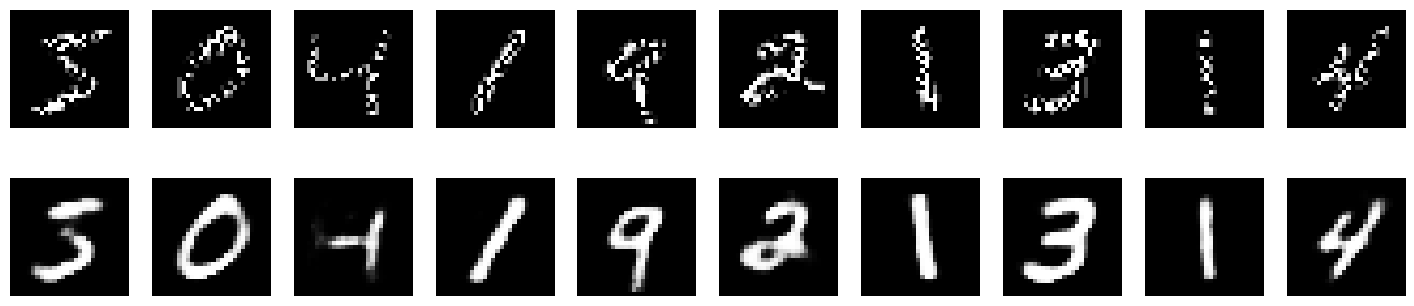

In [14]:
# Section 4.1

# Plotting the corrupted and restored images side-by-side
f, axes = plt.subplots(2, 10, figsize=(18,4))
for i, (img, res) in enumerate(zip(masked_x_train_sample, y_pred)):
    r1, c1 = 0, i
    r2, c2 = 1, i
    axes[r1,c1].imshow(img,cmap='gray')
    axes[r1,c1].axis('off')
    
    res = ((res * 128.0)+128.0).reshape(28,28)
    axes[r2,c2].imshow(res,cmap='gray')
    axes[r2,c2].axis('off')

## Convolution Neural Networks

Convolution neural networks (CNNs) have gained unparalleled popularity in computer vision tasks. A convolution neural network consists of several important components, such as,

* Convolution layers
* Pooling layers
* Dense layers (for final prediction)

In this chapter, we will use CNNs to learn the Cifar10 dataset. Like MNIST, Cifar10 is another popular dataset in computer vision. But it is a much more interesting dataset as you will see. Specifically, you will learn the following.

* How to do simple data exploration
* How to define a CNN model
* How to format data to suit model training
* How to train a model

In [15]:
# Section 4.2

import tensorflow_datasets as tfds
# Loading the CIFAR10 dataset
data = tfds.load('cifar10')

d:\Source Code\ML\Tensor Flow in Action\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [00:33<00:00, 32.45s/ url]

Dl Completed...: 100%|██████████| 1/1 [00:33<00:00, 33.67s/ url]
                                                                        

Dataset cifar10 downloaded and prepared to C:\Users\nakir\tensorflow_datasets\cifar10\3.0.2. Subsequent calls will reuse this data.


In [16]:
print(data)

{Split('train'): <_PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>, Split('test'): <_PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}


In [17]:
# Section 4.2

# Let's see the first element in the training set
for i in data["train"].take(1):
    print(i)

{'id': <tf.Tensor: shape=(), dtype=string, numpy=b'train_16399'>, 'image': <tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [18

## Plotting the data

Let's plot some data along with the image categories for those images.

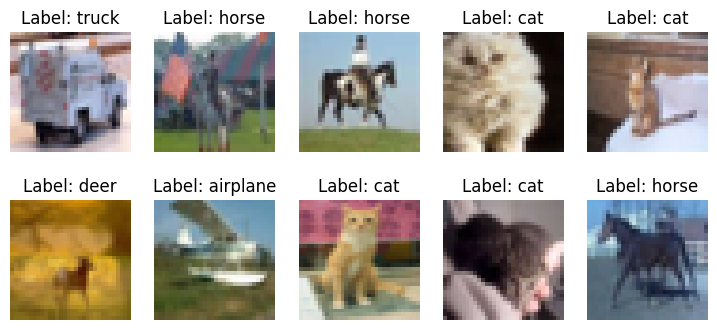

In [18]:
# Section 4.2

import matplotlib.pyplot as plt
%matplotlib inline

# Take 10 samples randomly to plot
sample_images, sample_labels = [],[]
for d in data["train"].shuffle(100, seed=4321).take(10):
    sample_images.append(d["image"].numpy())
    sample_labels.append(d["label"].numpy())

# Creating a label map mapping the integer label to the string
label_map = dict(zip(
    list(range(10)),
    ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]))

# Plotting the images
f, axes = plt.subplots(2, 5, figsize=(9,4))
for i, (img, lbl) in enumerate(zip(sample_images, sample_labels)):
    r, c = i//5, i%5
    axes[r,c].imshow(img,cmap='gray')
    axes[r,c].axis('off')
    axes[r,c].set_title("Label: {}".format(label_map[lbl]))

## Defining the model

Let's define a CNN model. But wait, we are getting an error trying to run this model. This is because, one needs to be careful of the output sizes of the model's each layer. In this case, the model we created has led to an invalid height and width dimensions **causing an error**.

In [19]:
# Section 4.2
# Code listing 4.2

from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

K.clear_session()

# Defining the CNN model
cnn = models.Sequential(
    [layers.Conv2D(filters=16,kernel_size=(9,9), strides=(2,2), activation='relu', input_shape=(32,32,3)), # 32->12
     layers.Conv2D(32, (7,7), activation='relu'), # 12 -> 6
     layers.Conv2D(64, (7,7), activation='relu'), # 6 -> -1
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')]
)

d:\Source Code\ML\Tensor Flow in Action\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Defining the model the correct way

Good thing we got that error out of the way. Now let's fix the model above so we don't have any errors.

In [20]:
# Section 4.2
# Code listing 4.3

from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

K.clear_session()

# Defining the CNN model without any errores
cnn = models.Sequential(
    [layers.Conv2D(filters=16,kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', input_shape=(32,32,3)), # 32->16
     layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'), # 16->8
     layers.Conv2D(32, (3,3), activation='relu', padding='same'), # 8 -> 8
     layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'), # 8->4
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(10, activation='softmax')]
)

# Compiling the model
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

## Training the model

Finally, you can train the model. But to do that we will need to slightly change the dataset object we have. We will convert the images to `float32` (which are originally `uint8`) and convert labels to one-hot encoded vectors. To do this we will use the `tf.data.DataSet.map()` function as we have done earlier.

Now let's train the model. We can see that training accuracy of the model is growing steadily. That's a great result! 

In [21]:
# Section 4.2

import tensorflow as tf

def format_data(x, depth):
    """ Create a tuple where 1st element is a batch of images 
    and the second is a batch of onehot encoded vectors"""
    return (tf.cast(x["image"], 'float32'), tf.one_hot(x["label"], depth=depth))

# Map the dataset using the function
tr_data = data["train"].map(lambda x: format_data(x, depth=10)).batch(32)

In [22]:
for d in tr_data.take(1):
    print(d)

(<tf.Tensor: shape=(32, 32, 32, 3), dtype=float32, numpy=
array([[[[143.,  96.,  70.],
         [141.,  96.,  72.],
         [135.,  93.,  72.],
         ...,
         [ 96.,  37.,  19.],
         [105.,  42.,  18.],
         [104.,  38.,  20.]],

        [[128.,  98.,  92.],
         [146., 118., 112.],
         [170., 145., 138.],
         ...,
         [108.,  45.,  26.],
         [112.,  44.,  24.],
         [112.,  41.,  22.]],

        [[ 93.,  69.,  75.],
         [118.,  96., 101.],
         [179., 160., 162.],
         ...,
         [128.,  68.,  47.],
         [125.,  61.,  42.],
         [122.,  59.,  39.]],

        ...,

        [[187., 150., 123.],
         [184., 148., 123.],
         [179., 142., 121.],
         ...,
         [198., 163., 132.],
         [201., 166., 135.],
         [207., 174., 143.]],

        [[187., 150., 117.],
         [181., 143., 115.],
         [175., 136., 113.],
         ...,
         [201., 164., 132.],
         [205., 168., 135.],
         

In [23]:
# Section 4.2
# Fit the data
history = cnn.fit(tr_data,epochs=25)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.2407 - loss: 2.2656
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.4044 - loss: 1.6153
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.4830 - loss: 1.4254
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.5302 - loss: 1.3057
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.5620 - loss: 1.2241
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.5904 - loss: 1.1526
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.6120 - loss: 1.0986
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.6278 - loss: 1.0523
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.6429 - loss: 1.0163
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.6560 - loss: 0.9816
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.6662 - loss: 0.9503
Epoch 12/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.6744 - loss: 0.9268
E

## Recurrent Neural Networks

Recurrent neural networks (RNNs) have proven their success in learning from time-series data.

In this chapter, we will use a RNN to learn to predict CO2 concentration levels in the next 5 years. Specifically, you will learn the following.

* How to do simple data exploration on time series data
* How to define a RNN model
* How to transfrom time series data to train a sequential model
* How to train a model

## Reading the data 

In [25]:
# Section 4.3

import pandas as pd
import requests
import os

def download_data():
    """ This function downloads the CO2 data from 
    https://datahub.io/core/co2-ppm/r/co2-mm-gl.csv
    if the file doesn't already exist
    """
    save_dir = "data"
    save_path = os.path.join(save_dir, 'co2-mm-gl.csv')

    # Create directories if they are not there
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Download the data and save
    if not os.path.exists(save_path):
        url = "https://datahub.io/core/co2-ppm/r/co2-mm-gl.csv"
        r = requests.get(url)
        with open(save_path, 'wb') as f:
            f.write(r.content)
    else:
        print("co2-mm-gl.csv already exists. Not downloading.")
    return save_path

# Downloading the data
save_path = download_data()

# Load the data 
data = pd.read_csv(save_path)
data.head()

,,Date,Decimal Date,Average,Trend
1979-01,1979.042,336.56,0.11,335.92,0.09
1979-02,1979.125,337.29,0.09,336.25,0.09
1979-03,1979.208,337.88,0.11,336.51,0.09
1979-04,1979.292,338.32,0.13,336.72,0.10
1979-05,1979.375,338.26,0.04,336.71,0.10


In [26]:
# Section 4.3

# Set the date as the index of the dataframe
data = data.set_index('Date')

## Plotting CO2 concentration over time

<Axes: xlabel='Date'>

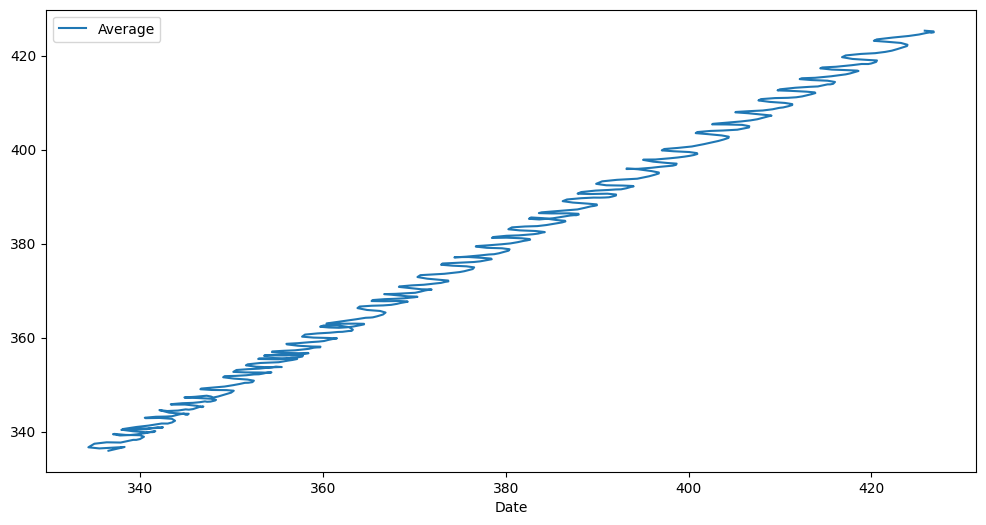

In [27]:
# Section 4.3

# Plotting the CO2 trend
data[["Average"]].plot(figsize=(12,6))

## Creating the `Average Diff` column

`Average Diff` is computed as,

`Average Diff(t) = Average(t) - Average(t-1)`

In [28]:
# Section 4.3

data["Average Diff"] = data["Average"] - data["Average"].shift(1).fillna(method='bfill')
data.head()

C:\Users\nakir\AppData\Local\Temp\ipykernel_21268\1966996508.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Average Diff"] = data["Average"] - data["Average"].shift(1).fillna(method='bfill')


,Decimal Date,Average,Trend,Average Diff
Date,,,,
336.56,0.11,335.92,0.09,0.00
337.29,0.09,336.25,0.09,0.33
337.88,0.11,336.51,0.09,0.26
338.32,0.13,336.72,0.10,0.21
338.26,0.04,336.71,0.10,-0.01


<Axes: xlabel='Date'>

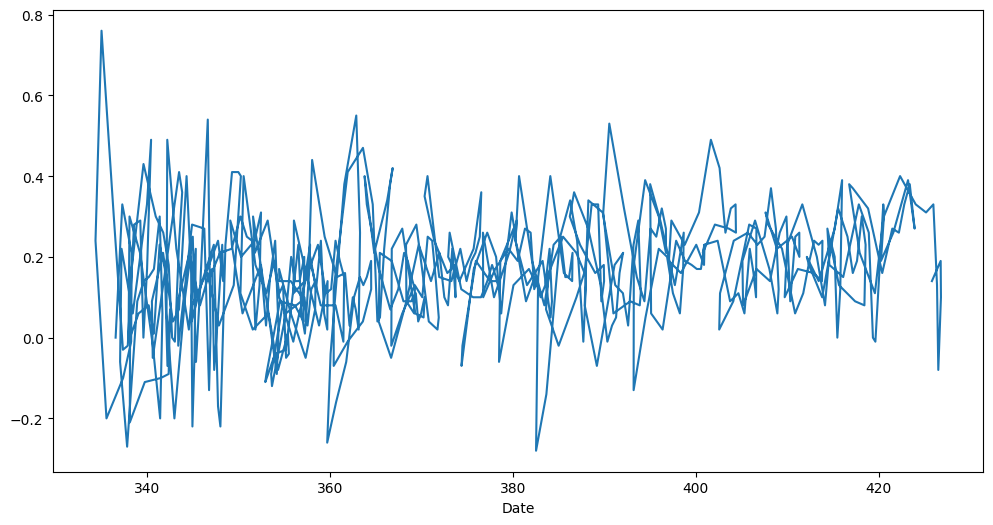

In [29]:
# Section 4.3

data["Average Diff"].plot(figsize=(12,6))

## Generating time-series data for the model

In [30]:
# Section 4.3
# Code listing 4.4/Code listing 4.5

import numpy as np

def generate_data(co2_arr,n_seq):
    """ Generating data for the model. 
    Input is a matrix of size (n x n_seq) and 
    Output is a vector of size n. """
    
    x, y = [],[]
    for i in range(co2_arr.shape[0]-n_seq):
        x.append(co2_arr[i:i+n_seq-1])
        y.append(co2_arr[i+n_seq-1:i+n_seq])
    x = np.array(x).reshape(-1,n_seq-1,1)
    y = np.array(y)
    return x,y

# Generating the data
x, y = generate_data(data["Average Diff"].values, 13)

# Let's print some data and see what we got
print("Original values: ", data["Average Diff"].values[:20])
print()
i = 0
for xx, yy in zip(x,y):
    print('x: ',xx.ravel(), ' y: ', yy.ravel())
    i += 1
    if i>5: break

Original values:  [ 0.    0.33  0.26  0.21 -0.01 -0.1  -0.2   0.24  0.76  0.3  -0.03 -0.02
  0.28  0.29  0.    0.17  0.49  0.33  0.06  0.22]

x:  [ 0.    0.33  0.26  0.21 -0.01 -0.1  -0.2   0.24  0.76  0.3  -0.03 -0.02]  y:  [0.28]
x:  [ 0.33  0.26  0.21 -0.01 -0.1  -0.2   0.24  0.76  0.3  -0.03 -0.02  0.28]  y:  [0.29]
x:  [ 0.26  0.21 -0.01 -0.1  -0.2   0.24  0.76  0.3  -0.03 -0.02  0.28  0.29]  y:  [0.]
x:  [ 0.21 -0.01 -0.1  -0.2   0.24  0.76  0.3  -0.03 -0.02  0.28  0.29  0.  ]  y:  [0.17]
x:  [-0.01 -0.1  -0.2   0.24  0.76  0.3  -0.03 -0.02  0.28  0.29  0.    0.17]  y:  [0.49]
x:  [-0.1  -0.2   0.24  0.76  0.3  -0.03 -0.02  0.28  0.29  0.    0.17  0.49]  y:  [0.33]


## Defining and training the model 

In [31]:
# Section 4.3

from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

K.clear_session()

# Defining the model
rnn = models.Sequential([
    layers.SimpleRNN(64),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
# Compiling the model
rnn.compile(loss='mse', optimizer='adam')

In [32]:
# Section 4.3
rnn.fit(x, y, shuffle=True, batch_size=64, epochs=25)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0277
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111 
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 
Epoch 9/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 
Epoch 10/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 
Epoch 11/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 
Epoch 12/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 
Epoch 13/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 
Epoch 14/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 
Epoch 15/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 
Epoch 16/25
9/9 ━━━━━━━━━━━━━━━━━━━

## Predicting using the trained model

In [33]:
# Section 4.3
# Code listing 4.6

import numpy as np

# Getting the last 12 values from the history to generate the first prediction
history = data["Average Diff"].values[-12:].reshape(1,-1,1)

# To hold the absolute values 
true_vals = []

# Holds the very last value in the history
prev_true = data["Average"].values[-1]

# Making predictions for 60 time steps
for i in range(60):
    # Make a single prediction
    p_diff = rnn.predict(history).reshape(1,-1,1)
    
    # Modifying the history so that we have 
    history = np.concatenate((history[:,1:,:],p_diff),axis=1)
    # Generating the absolute prediction
    true_vals.append(prev_true+p_diff[0,0,0])
    # Updating the prev_true
    prev_true = true_vals[-1]
    
print("Predictions: {}".format(true_vals[:10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

## Plotting the current values and predictions 

Text(0.5, 1.0, 'Evolution of CO2 Concentration over Time')

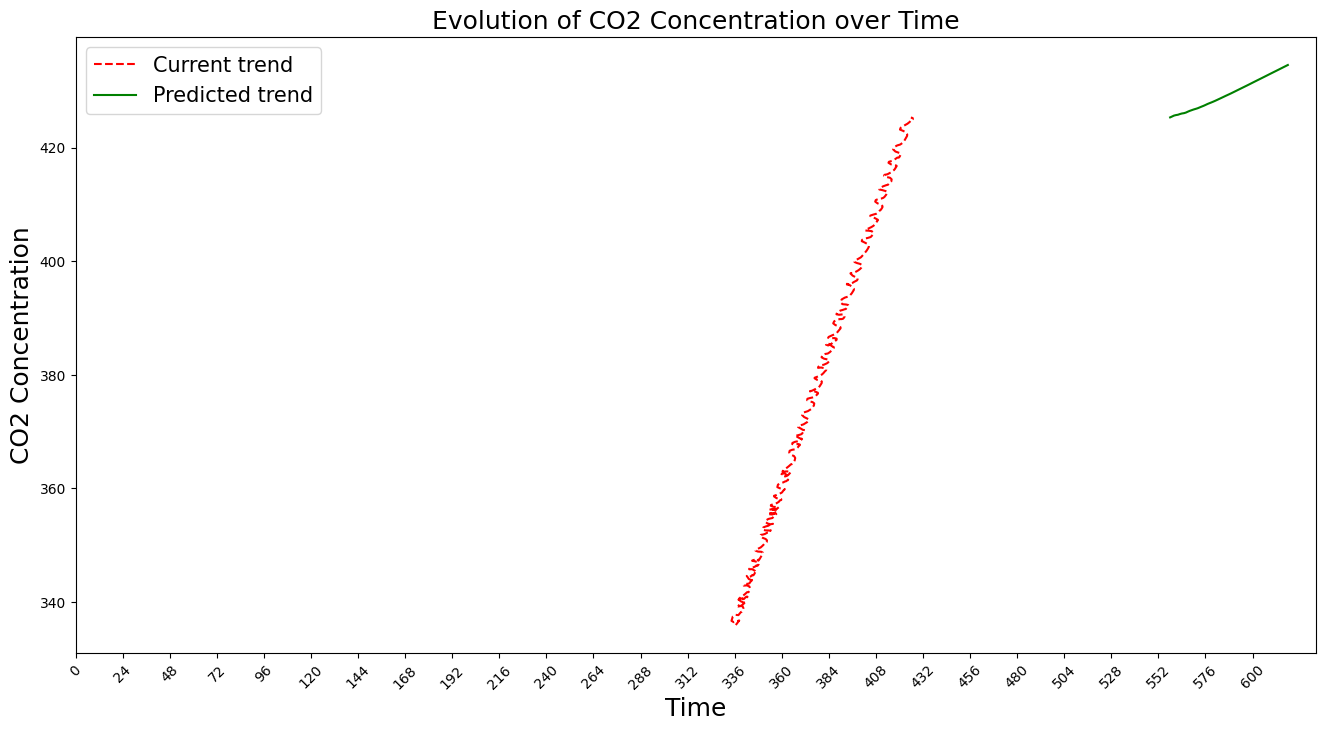

In [37]:
# Section 4.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the current and predicted trends
plt.figure(figsize=(16,8))

# Plotting the current trend
plt.plot(data["Average"], c='r', linestyle='--', label="Current trend")

# Creating a pd.Series from predictions
# Use numeric index for predictions
pred_ser = pd.Series(
    [data["Average"].values[-1]]+true_vals, 
    index=list(range(len(data), len(data)+61))
)

# Plotting the predictions
plt.plot(pred_ser, c='g', label='Predicted trend')

# Annotating the plot
plt.xticks(np.arange(0, data["Average"].shape[0]+60, 24),rotation=45)
plt.xlabel('Time', fontsize=18)
plt.ylabel('CO2 Concentration', fontsize=18)
plt.legend(prop={'size': 15})
plt.title('Evolution of CO2 Concentration over Time', fontsize=18)